In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Read in the data
df= pd.read_csv(r"C:\Users\chres\Downloads\Movies.csv")

In [ ]:
df.head()

In [8]:
df=df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [7]:
#print(df.dtypes)
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')


In [9]:
df['yearcorrect']=df['released'].str.extract(pat='([0-9]{4})').astype(int)

In [ ]:
df.sort_values(by=['gross'],inplace=False, ascending=False)

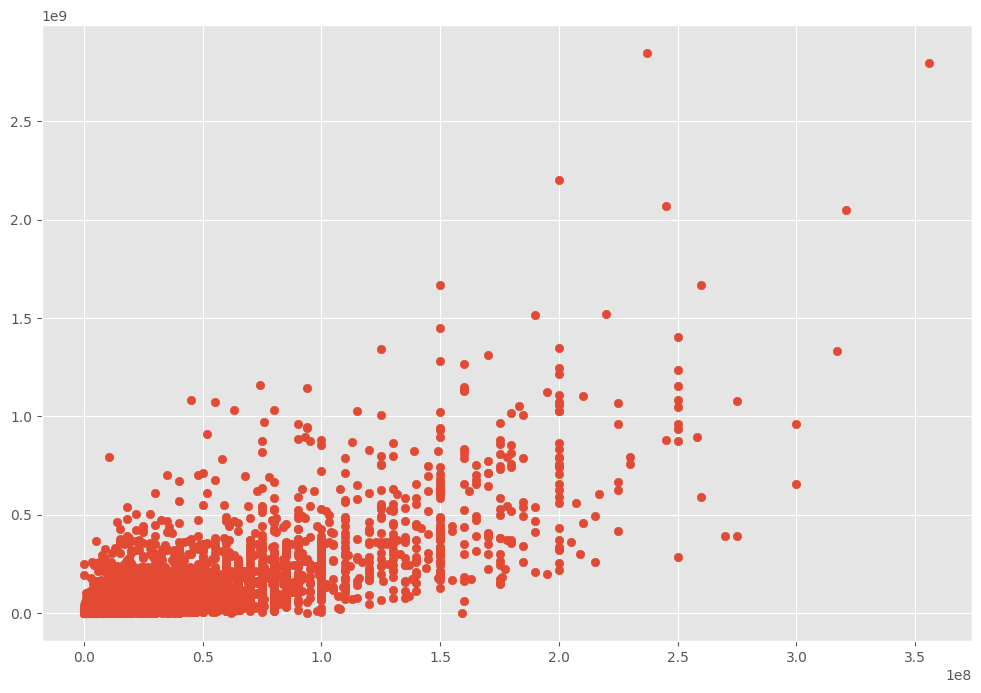

In [17]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.show()

           budget     gross   runtime     score     votes      year
budget   1.000000  0.740247  0.318695  0.072001  0.439675  0.327722
gross    0.740247  1.000000  0.275796  0.222556  0.614751  0.274321
runtime  0.318695  0.275796  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.222556  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.614751  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.274321  0.075077  0.056386  0.206021  1.000000


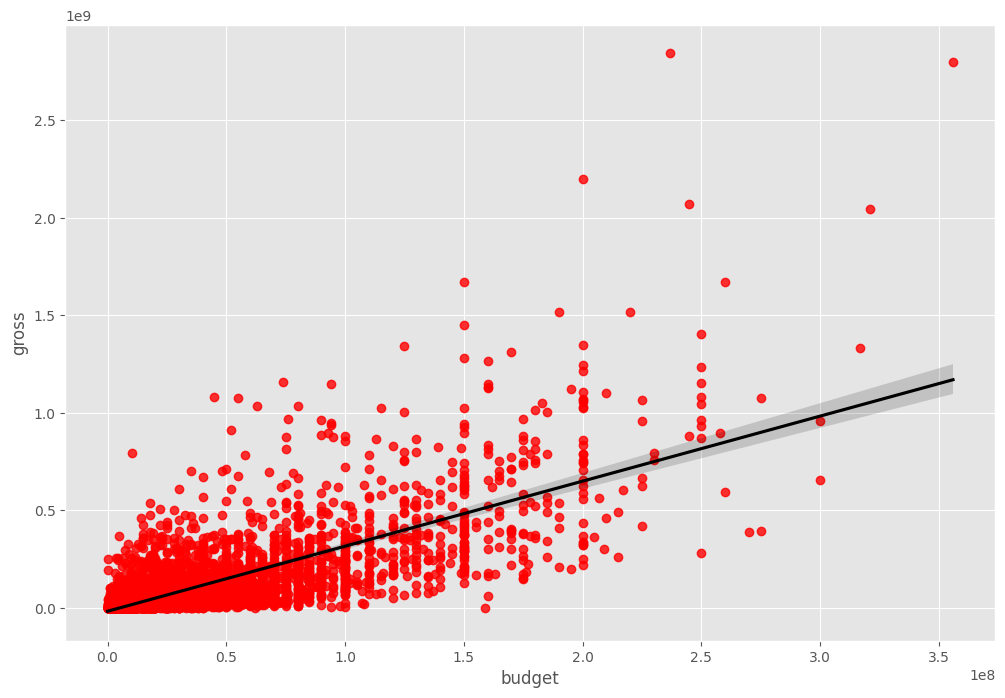

In [18]:
sns.regplot(x="budget", y="gross", data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

subset = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']]
correlation_matrix = subset.corr()
print(correlation_matrix)

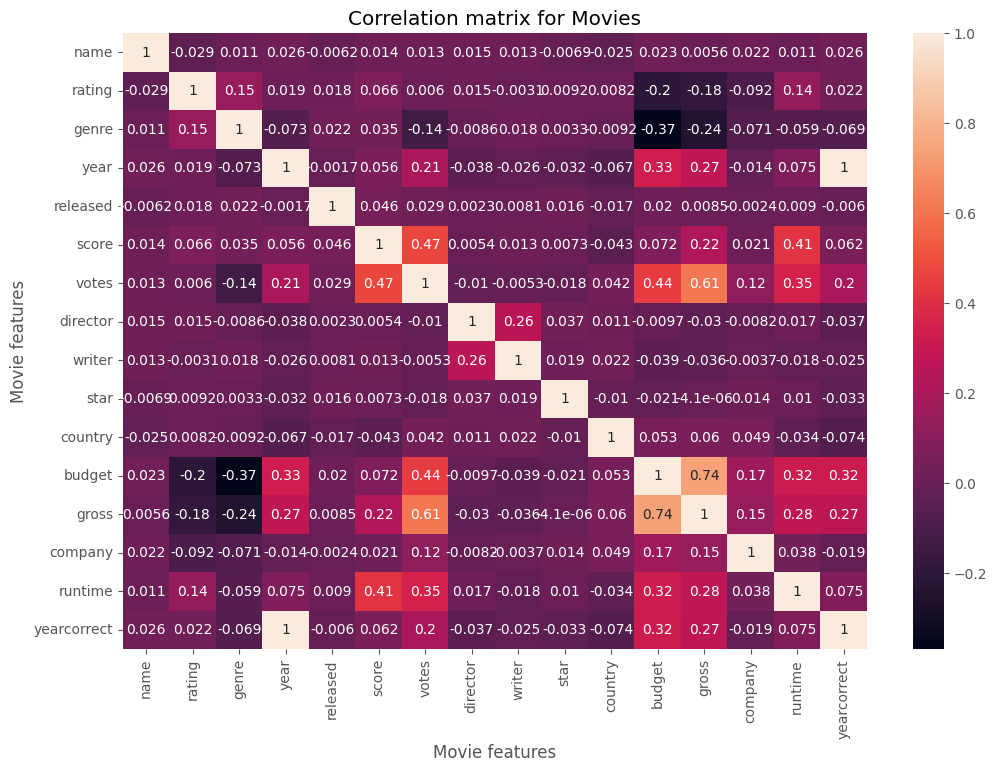

In [16]:
# Copy the original dataframe for modification
df_numerized = df.copy()

# Convert object columns to 'category' and then to numeric codes
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Function to perform ANOVA for each categorical column
def perform_anova(df, numeric_col):
    anova_results = {}
    for col_name in df.columns:
        if df[col_name].dtype == 'category':  # Check for categorical columns
            groups = [df[numeric_col][df[col_name] == category] for category in df[col_name].cat.categories]
            f_stat, p_value = f_oneway(*groups)  # Perform ANOVA
            anova_results[col_name] = (f_stat, p_value)
    return anova_results

# Perform ANOVA on 'gross' across categorical features
anova_results = perform_anova(df_numerized, 'gross')

# Display ANOVA results
for col, (f_stat, p_val) in anova_results.items():
    print(f"ANOVA for 'gross' by '{col}': F-statistic = {f_stat:.4f}, P-value = {p_val:.4f}")
    if p_val < 0.05:
        print(f"  --> Significant differences found in 'gross' across '{col}' categories.\n")
    else:
        print(f"  --> No significant differences found in 'gross' across '{col}' categories.\n")

# Calculate the correlation matrix
correlation_matrix = df_numerized.corr(method='pearson')

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()



In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
#Read in the data
df= pd.read_csv(r"C:\Users\chres\Downloads\Movies.csv")
df.head()
df=df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#print(df.dtypes)
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['yearcorrect']=df['released'].str.extract(pat='([0-9]{4})').astype(int)
df.sort_values(by=['gross'],inplace=False, ascending=False)
plt.scatter(x=df['budget'],y=df['gross'])
plt.show()
sns.regplot(x="budget", y="gross", data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

subset = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']]
correlation_matrix = subset.corr()
print(correlation_matrix)
# Copy the original dataframe for modification
df_numerized = df.copy()

# Convert object columns to 'category' and then to numeric codes
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Function to perform ANOVA for each categorical column
def perform_anova(df, numeric_col):
    anova_results = {}
    for col_name in df.columns:
        if df[col_name].dtype == 'category':  # Check for categorical columns
            groups = [df[numeric_col][df[col_name] == category] for category in df[col_name].cat.categories]
            f_stat, p_value = f_oneway(*groups)  # Perform ANOVA
            anova_results[col_name] = (f_stat, p_value)
    return anova_results

# Perform ANOVA on 'gross' across categorical features
anova_results = perform_anova(df_numerized, 'gross')

# Display ANOVA results
for col, (f_stat, p_val) in anova_results.items():
    print(f"ANOVA for 'gross' by '{col}': F-statistic = {f_stat:.4f}, P-value = {p_val:.4f}")
    if p_val < 0.05:
        print(f"  --> Significant differences found in 'gross' across '{col}' categories.\n")
    else:
        print(f"  --> No significant differences found in 'gross' across '{col}' categories.\n")

# Calculate the correlation matrix
correlation_matrix = df_numerized.corr(method='pearson')

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()